# Distinguish Your Own Digits (DYOD)

You are going to write a classifier that distinguishes between the number 3 and number 8.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

From the command line run `pip install mnist`. This is a library that will help you bring down the mnist dataset. If you run this from a notebook, you need to put  `!pip install mnist` in a cell by itself.

In [3]:
!pip install mnist

## Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


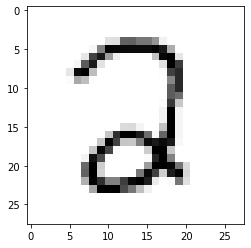

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

In [15]:
#Impoting functions from 'Kudzu'
from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Sampler,Dataloader

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

from kudzu.layer import Sigmoid,Relu
from kudzu.layer import Affine

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.


In [17]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [18]:
training_data_x = X_train
testing_data_x = X_test
training_data_y = y_train.reshape(-1,1)
testing_data_y = y_test.reshape(-1,1)

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("last", 2, 1), Sigmoid("last")]
model_nn = Model(layers)
model_lr = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

xavier
xavier
xavier
xavier
xavier


In [20]:
nn_learner = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(nn_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
nn_learner.set_callbacks([acc_nn])

In [21]:
lr_learner = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(lr_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
lr_learner.set_callbacks([acc_lr])

In [22]:
nn_learner.train_loop(dl)

Epoch 0, Loss 0.2399
Training Accuracy: 0.7439, Testing Accuracy: 0.7762



Epoch 10, Loss 0.0591
Training Accuracy: 0.9397, Testing Accuracy: 0.9516



Epoch 20, Loss 0.0422
Training Accuracy: 0.9529, Testing Accuracy: 0.9632



Epoch 30, Loss 0.0354
Training Accuracy: 0.9604, Testing Accuracy: 0.9672



Epoch 40, Loss 0.0315
Training Accuracy: 0.9654, Testing Accuracy: 0.9708



Epoch 50, Loss 0.0289
Training Accuracy: 0.9675, Testing Accuracy: 0.9713



Epoch 60, Loss 0.027
Training Accuracy: 0.9689, Testing Accuracy: 0.9728



Epoch 70, Loss 0.0255
Training Accuracy: 0.9708, Testing Accuracy: 0.9738



Epoch 80, Loss 0.0243
Training Accuracy: 0.9720, Testing Accuracy: 0.9733



Epoch 90, Loss 0.0233
Training Accuracy: 0.9728, Testing Accuracy: 0.9723



Epoch 100, Loss 0.0224
Training Accuracy: 0.9740, Testing Accuracy: 0.9738



Epoch 110, Loss 0.0216
Training Accuracy: 0.9747, Testing Accuracy: 0.9743



Epoch 120, Loss 0.0209
Training Accuracy: 0.9764, Testing Accuracy: 0.9748



Epoch 130, Loss 0.0203
Training Accuracy: 0.9773, Testing Accuracy: 0.9758



Epoch 140, Loss 0.0197
Training Accuracy: 0.9781, Testing Accuracy: 0.9758



Epoch 150, Loss 0.0191
Training Accuracy: 0.9787, Testing Accuracy: 0.9763



Epoch 160, Loss 0.0186
Training Accuracy: 0.9790, Testing Accuracy: 0.9768



Epoch 170, Loss 0.0181
Training Accuracy: 0.9795, Testing Accuracy: 0.9768



Epoch 180, Loss 0.0177
Training Accuracy: 0.9801, Testing Accuracy: 0.9768



Epoch 190, Loss 0.0172
Training Accuracy: 0.9806, Testing Accuracy: 0.9768



Epoch 200, Loss 0.0168
Training Accuracy: 0.9811, Testing Accuracy: 0.9768



Epoch 210, Loss 0.0164
Training Accuracy: 0.9816, Testing Accuracy: 0.9778



Epoch 220, Loss 0.016
Training Accuracy: 0.9822, Testing Accuracy: 0.9788



Epoch 230, Loss 0.0156
Training Accuracy: 0.9826, Testing Accuracy: 0.9788



Epoch 240, Loss 0.0153
Training Accuracy: 0.9836, Testing Accuracy: 0.9793



0.03146644787278434

In [23]:
lr_learner.train_loop(dl)

Epoch 0, Loss 0.234
Training Accuracy: 0.6953, Testing Accuracy: 0.6951



Epoch 10, Loss 0.1034
Training Accuracy: 0.9084, Testing Accuracy: 0.9183



Epoch 20, Loss 0.0789
Training Accuracy: 0.9280, Testing Accuracy: 0.9405



Epoch 30, Loss 0.0677
Training Accuracy: 0.9363, Testing Accuracy: 0.9486



Epoch 40, Loss 0.0611
Training Accuracy: 0.9418, Testing Accuracy: 0.9526



Epoch 50, Loss 0.0566
Training Accuracy: 0.9457, Testing Accuracy: 0.9551



Epoch 60, Loss 0.0533
Training Accuracy: 0.9483, Testing Accuracy: 0.9582



Epoch 70, Loss 0.0508
Training Accuracy: 0.9496, Testing Accuracy: 0.9597



Epoch 80, Loss 0.0488
Training Accuracy: 0.9513, Testing Accuracy: 0.9612



Epoch 90, Loss 0.0471
Training Accuracy: 0.9523, Testing Accuracy: 0.9617



Epoch 100, Loss 0.0457
Training Accuracy: 0.9534, Testing Accuracy: 0.9627



Epoch 110, Loss 0.0445
Training Accuracy: 0.9538, Testing Accuracy: 0.9637



Epoch 120, Loss 0.0435
Training Accuracy: 0.9546, Testing Accuracy: 0.9637



Epoch 130, Loss 0.0426
Training Accuracy: 0.9556, Testing Accuracy: 0.9647



Epoch 140, Loss 0.0418
Training Accuracy: 0.9567, Testing Accuracy: 0.9657



Epoch 150, Loss 0.041
Training Accuracy: 0.9575, Testing Accuracy: 0.9657



Epoch 160, Loss 0.0404
Training Accuracy: 0.9580, Testing Accuracy: 0.9657



Epoch 170, Loss 0.0398
Training Accuracy: 0.9588, Testing Accuracy: 0.9657



Epoch 180, Loss 0.0392
Training Accuracy: 0.9593, Testing Accuracy: 0.9657



Epoch 190, Loss 0.0387
Training Accuracy: 0.9596, Testing Accuracy: 0.9657



Epoch 200, Loss 0.0383
Training Accuracy: 0.9604, Testing Accuracy: 0.9652



Epoch 210, Loss 0.0378
Training Accuracy: 0.9607, Testing Accuracy: 0.9652



Epoch 220, Loss 0.0374
Training Accuracy: 0.9610, Testing Accuracy: 0.9652



Epoch 230, Loss 0.0371
Training Accuracy: 0.9614, Testing Accuracy: 0.9652



Epoch 240, Loss 0.0367
Training Accuracy: 0.9616, Testing Accuracy: 0.9657



0.047820496345996874

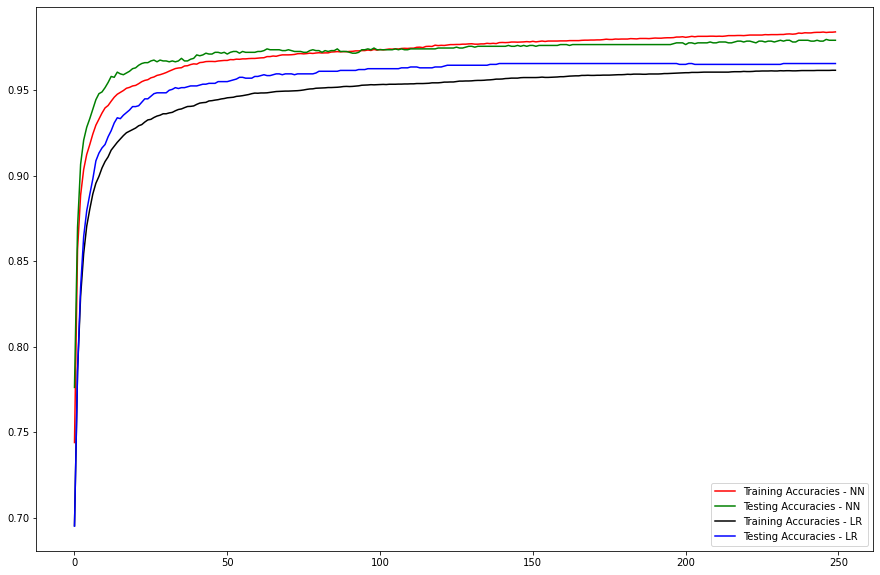

In [24]:
#comparing the results of NN and LR
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")
plt.legend()

#### Plotting the outputs of this layer of the NN.


In [25]:
new_model = Model(layers[:-2])
testing_plot = new_model(testing_data_x)

Text(0.5, 1.0, 'Outputs')

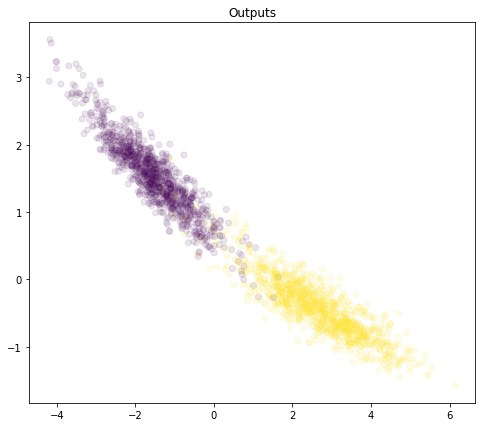

In [26]:
# Plotting the scatter plot of points and color coding by class
plt.figure(figsize=(8,7))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

Probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
#creating the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_gridflat = np.ravel(x_grid)
y_gridflat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_gridflat, y_gridflat)).T

prob_contour = model_prob(X).reshape(100,100) 

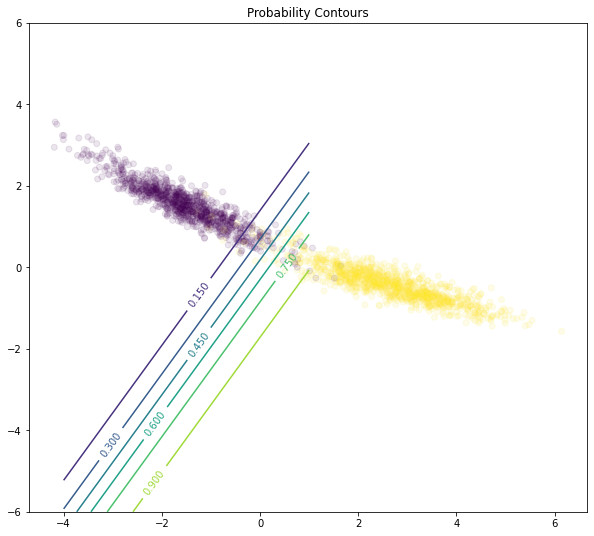

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,prob_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );